In [1]:
#init 

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

f = "./10pkt_parse.txt"

time = np.loadtxt(f,delimiter=',',usecols=[0],dtype=int)
p_type = np.loadtxt(f,delimiter=',',usecols=[1],dtype=str)
p_len = np.loadtxt(f,delimiter=',',usecols=[2],dtype=int)

In [9]:
# devide time by time unit

total_line = 60
div_unit = 100

unit_time = [];
for i in range(total_line):
        unit_time.append(int(time[i]/div_unit))
unit_time

[4082,
 4083,
 4083,
 4083,
 4083,
 4083,
 4083,
 4083,
 4083,
 4083,
 4083,
 4083,
 4083,
 4084,
 4084,
 4084,
 4085,
 4085,
 4085,
 4085,
 4085,
 4086,
 4086,
 4086,
 4087,
 4087,
 4087,
 4087,
 4087,
 4087,
 4087,
 4087,
 4087,
 4087,
 4087,
 4087,
 4088,
 4088,
 4088,
 4088,
 4088,
 4088,
 4088,
 4088,
 4088,
 4088,
 4088,
 4088,
 4089,
 4089,
 4089,
 4089,
 4089,
 4089,
 4089,
 4089,
 4089,
 4089,
 4089,
 4089]

In [24]:
# get a count of traffic by time unit

real_init_time = 4082 
init_time = real_init_time - 1

traffic_range = unit_time[total_line-1]%init_time + 1
counter = list(range(traffic_range))

for i in range(traffic_range):
    counter[i] = 0;
    
for i in range(total_line):
    counter[unit_time[i]%init_time] += 1;

for i in range(traffic_range):
    print(counter[i]);

0
1
12
3
5
3
12
12
12


In [25]:
num_type = 3

cluster = np.ones((traffic_range,num_type),dtype={"names":("ptype","len"),"formats":("str","int")})
cluster

array([[('', 1), ('', 1), ('', 1)],
       [('', 1), ('', 1), ('', 1)],
       [('', 1), ('', 1), ('', 1)],
       [('', 1), ('', 1), ('', 1)],
       [('', 1), ('', 1), ('', 1)],
       [('', 1), ('', 1), ('', 1)],
       [('', 1), ('', 1), ('', 1)],
       [('', 1), ('', 1), ('', 1)],
       [('', 1), ('', 1), ('', 1)]],
      dtype=[('ptype', '<U'), ('len', '<i4')])

In [26]:
for i in range(traffic_range):
    for k in range(3):
        cluster[i][k][1] = 0;
        
for i in range(traffic_range):
    for k in range(counter[i]):
        if p_type[k] == "MWr":
            cluster[i][0][1] += p_len[k]
        elif p_type[k] == "MRd":
            cluster[i][1][1] += p_len[k]
        elif p_type[k] == "CplD":
            cluster[i][2][1] += p_len[k]

In [27]:
cluster

array([[('',  0), ('',  0), ('',  0)],
       [('',  2), ('',  0), ('',  0)],
       [('', 20), ('',  4), ('',  4)],
       [('',  6), ('',  0), ('',  0)],
       [('', 10), ('',  0), ('',  0)],
       [('',  6), ('',  0), ('',  0)],
       [('', 20), ('',  4), ('',  4)],
       [('', 20), ('',  4), ('',  4)],
       [('', 20), ('',  4), ('',  4)]],
      dtype=[('ptype', '<U'), ('len', '<i4')])

<function matplotlib.pyplot.show(*args, **kw)>

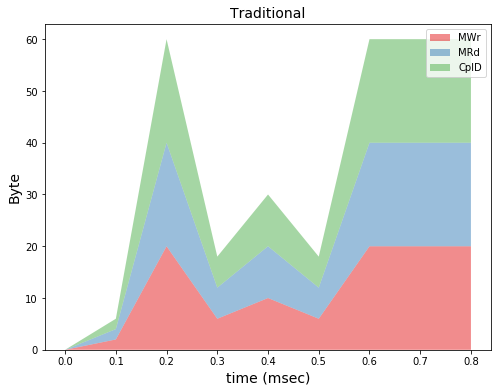

In [28]:
import seaborn as sns

# unit based on msec
unit = 10
x_start = 0
x_tol = 1 / unit
x_end = (unit_time[total_line-1] - unit_time[0])/unit + x_tol * 2

x = np.arange(x_start,x_end,x_tol)
y_mwr = np.arange(traffic_range)
y_mrd = np.arange(traffic_range)
y_cpid = np.arange(traffic_range)
labels = ["MWr","MRd","CpID"]

for i in range(traffic_range):
    y_mwr[i] = cluster[i][0][1];
    y_mrd[i] = cluster[i][0][1]; 
    y_cpid[i] = cluster[i][0][1];

pal = sns.color_palette("Set1")
fig, ax = plt.subplots(figsize=(8,6))
ax.stackplot(x,y_mwr,y_mrd,y_cpid,labels=labels,colors=pal,alpha=0.5)

ax.set_xlabel("time (msec)",size=14)
ax.set_ylabel("Byte",size=14)
ax.set_title("Traditional",size=14)
ax.legend(loc="best")
plt.savefig("traditinal_tx_10pkt.pdf",dpi=300) 

plt.show